In [1]:
import pandas as pd 
import os 
import numpy as nps

Text(0.5, 0.98, 'Healthy vs Brain Tumor')

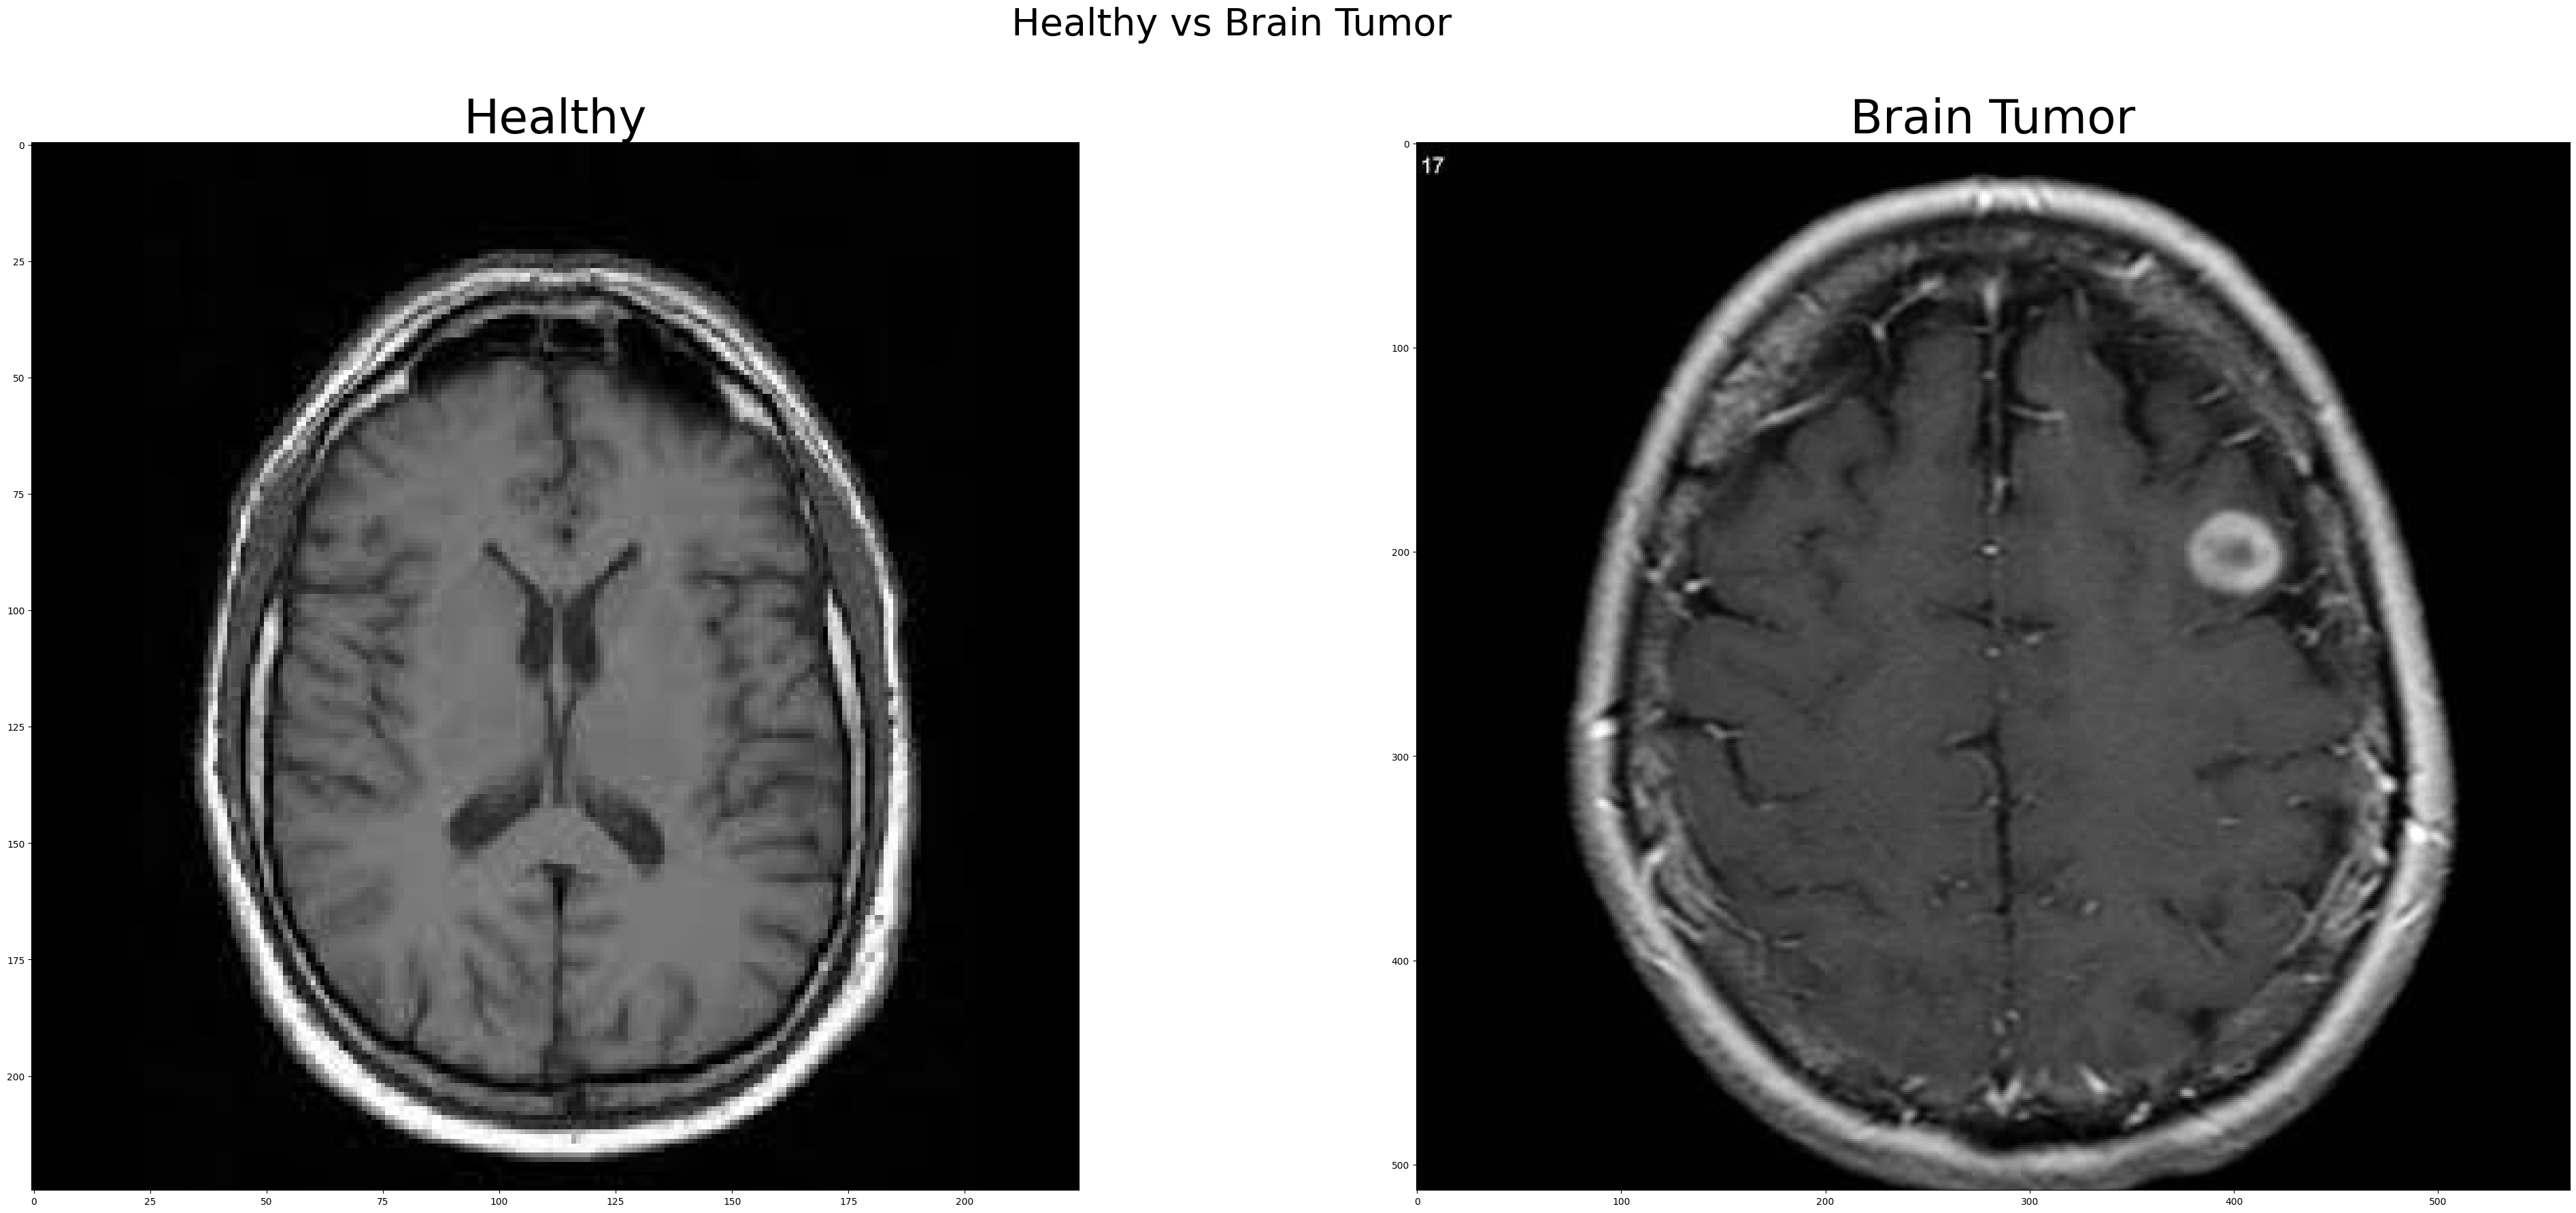

In [2]:
import numpy as np 
from PIL import Image
a = np.array(Image.open('/Users/sivaguganjayachandran/Documents/python programming/Brain Tumor data/Brain Tumor Data Set/Healthy/Not Cancer  (45).jpg'))
a.shape

b = np.array(Image.open('/Users/sivaguganjayachandran/Documents/python programming/Brain Tumor data/Brain Tumor Data Set/Brain Tumor/Cancer (862).jpg'))

import matplotlib.pyplot as plt 

fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize = (50,20))


ax[0].imshow(a[:,:,0], cmap = 'grey')
ax[0].set_title('Healthy', fontsize= 50)
ax[1].imshow(b[:,:,1], cmap = 'grey')
ax[1].set_title('Brain Tumor', fontsize= 50)



fig.suptitle('Healthy vs Brain Tumor', fontsize= 40)

In [3]:
path_healthy = '/Users/sivaguganjayachandran/Documents/python programming/Brain Tumor data/Brain Tumor Data Set/Healthy/'
path_tumor = '/Users/sivaguganjayachandran/Documents/python programming/Brain Tumor data/Brain Tumor Data Set/Brain Tumor/'

healthy = os.listdir(path_healthy)
tumor   = os.listdir(path_tumor)

In [4]:
images = []
labels = []
size = []
for i, x in enumerate(tumor):
    if x[-4:] == '.jpg' or x[-4:] == '.png' :
        img = Image.open(path_tumor + x).convert('RGB')
        img = img.resize((256,256)) 
        size.append(img.size)
        images.append(np.array(img)/255)     # normalize the array
        labels.append(1) # 1 indicate presence of tumor

for i, x in enumerate(healthy):
    if x[-4:] == '.jpg' or x[-4:] == '.png' :
        img = Image.open(path_healthy + x).convert('RGB')
        img = img.resize((256,256)) 
        size.append(img.size)
        images.append(np.array(img)/255)    # normalize the array
        labels.append(0)  # 0 indicate absence of tumor
   

In [5]:
df = pd.DataFrame(size)
df[0].value_counts()

0
256    4434
Name: count, dtype: int64

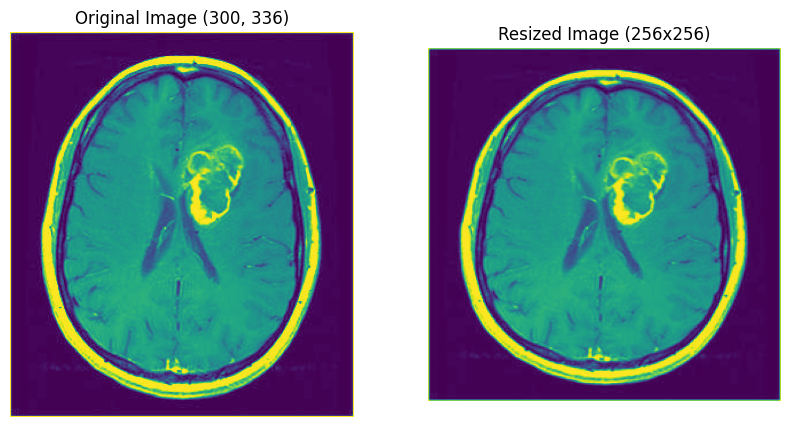

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assuming tumor is a list of image filenames
index = np.random.randint(0, 1000)
img_path = '/Users/sivaguganjayachandran/Documents/python programming/Brain Tumor data/Brain Tumor Data Set/Brain Tumor/'

# Open the original image
img = Image.open(img_path + tumor[index])

# Resize the image
resized_img = img.resize((256, 256))

# Create a figure to display images
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f'Original Image {img.size}')
plt.axis('off')  # Turn off axis

# Display resized image
plt.subplot(1, 2, 2)
plt.imshow(resized_img)
plt.title('Resized Image (256x256)')
plt.axis('off')  # Turn off axis

# Show the plot
plt.show()

In [7]:
images = np.array(images)
labels = np.array(labels)

In [8]:
images.shape

(4434, 256, 256, 3)

In [9]:
from sklearn.model_selection import train_test_split

#help(train_test_split)

#X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, random_state = 10 )

#split the data into test, train and validation groups
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.30, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=10)


In [10]:
np.max(X_train), np.min(X_train), X_train.shape

(1.0, 0.0, (3103, 256, 256, 3))

In [11]:
from tensorflow import keras
from keras import models
from keras import layers 
from keras import regularizers

In [12]:
model = keras.models.Sequential()

model.add(layers.Input(shape = (256,256,3) ))
model.add(layers.Conv2D(
                        filters = 32, 
                        kernel_size = (3,3), 
                        padding = 'same', 
                        strides = 1, 
                        kernel_regularizer=regularizers.l2(0.001),
                        activation = 'relu'
                        ))
model.add(layers.MaxPooling2D(
                        pool_size = (2,2),
                        strides = 2
                        ))
model.add(layers.Conv2D(
                        filters = 32, 
                        kernel_size = (3,3), 
                        padding = 'same', 
                        strides = 1, 
                        kernel_regularizer=regularizers.l2(0.001),
                        activation = 'relu'
                        ))
model.add(layers.MaxPooling2D(
                        pool_size = (2,2),
                        strides = 2
                        ))
model.add(layers.Conv2D(
                        filters = 32, 
                        kernel_size = (3,3), 
                        padding = 'same', 
                        strides = 1, 
                        kernel_regularizer=regularizers.l2(0.001),
                        activation = 'relu'
                        ))
model.add(layers.MaxPooling2D(
                        pool_size = (2,2),
                        strides = 2
                        ))
model.add(layers.Flatten())
model.add(layers.Dense(256,
                       activation = 'relu'
                      ))
model.add(layers.Dense(1,
                       activation = 'sigmoid'
                      ))

#opt = keras.optimizers.SGD(learning_rate = 0.005)

opt2 = keras.optimizers.Adam(learning_rate=1.5e-4)
model.compile(optimizer = opt2, loss = 'binary_crossentropy', metrics = ['accuracy'])


train_1 = model.fit(X_train, y_train, epochs = 15,  shuffle = True, validation_data = (X_val, y_val) )


Epoch 1/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 80s 814ms/step - accuracy: 0.6900 - loss: 0.6487 - val_accuracy: 0.8271 - val_loss: 0.4674
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 77s 795ms/step - accuracy: 0.8670 - loss: 0.3963 - val_accuracy: 0.8797 - val_loss: 0.3530
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 76s 778ms/step - accuracy: 0.9074 - loss: 0.3029 - val_accuracy: 0.8962 - val_loss: 0.3022
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 767ms/step - accuracy: 0.9389 - loss: 0.2281 - val_accuracy: 0.9414 - val_loss: 0.2280
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 77s 789ms/step - accuracy: 0.9717 - loss: 0.1627 - val_accuracy: 0.9474 - val_loss: 0.2275
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 84s 862ms/step - accuracy: 0.9863 - loss: 0.1254 - val_accuracy: 0.9534 - val_loss: 0.1900
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 92s 945ms/step - accuracy: 0.9879 - loss: 0.1062 - val_accuracy: 0.9489 - val_loss: 0.1919
Epoch 8/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 85s 871ms/step - accuracy: 0.9908 - loss: 0.0993 - val_accu

In [13]:
model2 = keras.models.Sequential()

model2.add(layers.Input(shape = (256,256,3) ))
model2.add(layers.Conv2D(
                        filters = 32, 
                        kernel_size = (3,3), 
                        padding = 'same', 
                        strides = 1, 
                        kernel_regularizer=regularizers.l2(0.0001),
                        activation = 'relu'
                        ))
model2.add(layers.MaxPooling2D(
                        pool_size = (2,2),
                        strides = 2
                        ))
model2.add(layers.Conv2D(
                        filters = 32, 
                        kernel_size = (3,3), 
                        padding = 'same', 
                        strides = 1, 
                        kernel_regularizer=regularizers.l2(0.0001),
                        activation = 'relu'
                        ))
model2.add(layers.MaxPooling2D(
                        pool_size = (2,2),
                        strides = 2
                        ))
model2.add(layers.Conv2D(
                        filters = 32, 
                        kernel_size = (3,3), 
                        padding = 'same', 
                        strides = 1, 
                        kernel_regularizer=regularizers.l2(0.0001),
                        activation = 'relu'
                        ))
model2.add(layers.MaxPooling2D(
                        pool_size = (2,2),
                        strides = 2
                        ))
model2.add(layers.Flatten())
model2.add(layers.Dense(256,
                       activation = 'relu'
                      ))
model2.add(layers.Dense(1,
                       activation = 'sigmoid'
                      ))

#opt = keras.optimizers.SGD(learning_rate = 0.005)

opt2 = keras.optimizers.Adam(learning_rate=1.5e-4)
model2.compile(optimizer = opt2, loss = 'binary_crossentropy', metrics = ['accuracy'])

train_2 = model2.fit(X_train, y_train, epochs = 15,  shuffle = True, validation_data = (X_val, y_val) )

Epoch 1/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 88s 905ms/step - accuracy: 0.6731 - loss: 0.5926 - val_accuracy: 0.8632 - val_loss: 0.3358
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 85s 874ms/step - accuracy: 0.9030 - loss: 0.2754 - val_accuracy: 0.8857 - val_loss: 0.2962
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 90s 932ms/step - accuracy: 0.9347 - loss: 0.2059 - val_accuracy: 0.9323 - val_loss: 0.2001
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 86s 883ms/step - accuracy: 0.9735 - loss: 0.1062 - val_accuracy: 0.9504 - val_loss: 0.1671
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 86s 889ms/step - accuracy: 0.9821 - loss: 0.0916 - val_accuracy: 0.9338 - val_loss: 0.1805
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 85s 880ms/step - accuracy: 0.9920 - loss: 0.0558 - val_accuracy: 0.9579 - val_loss: 0.1316
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 86s 889ms/step - accuracy: 0.9961 - loss: 0.0345 - val_accuracy: 0.9594 - val_loss: 0.1157
Epoch 8/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 91s 942ms/step - accuracy: 0.9977 - loss: 0.0228 - val_accu

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer
from keras import optimizers


model3 = Sequential()

model3.add(InputLayer(input_shape=(256,256,3)))

model3.add(Conv2D(16, (3*3), activation="relu"))
model3.add(MaxPool2D())

model3.add(Conv2D(32, (3*3), activation="relu"))
model3.add(MaxPool2D())

model3.add(Conv2D(32, (3*3), activation="relu"))
model3.add(MaxPool2D())

model3.add(Flatten())

model3.add(Dense(256, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

model3.compile(optimizer=keras.optimizers.Adam(learning_rate=1.5e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

train_3 = model3.fit(X_train, y_train ,epochs=15, validation_data = (X_val, y_val))

/opt/anaconda3/envs/msu/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.6101 - loss: 0.6362 - val_accuracy: 0.7744 - val_loss: 0.4460
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.8366 - loss: 0.3843 - val_accuracy: 0.8707 - val_loss: 0.3178
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.9091 - loss: 0.2446 - val_accuracy: 0.9008 - val_loss: 0.2726
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 286s 3s/step - accuracy: 0.9440 - loss: 0.1715 - val_accuracy: 0.9173 - val_loss: 0.2079
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 290s 3s/step - accuracy: 0.9723 - loss: 0.0918 - val_accuracy: 0.9444 - val_loss: 0.1544
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.9831 - loss: 0.0594 - val_accuracy: 0.9594 - val_loss: 0.1225
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 292s 3s/step - accuracy: 0.9933 - loss: 0.0372 - val_accuracy: 0.9308 - val_loss: 0.1605
Epoch 8/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9889 - loss: 0.0381 - val_accuracy: 0.9549 - v

In [15]:
# l2 = 0.001 , dropout = 0.2 & 0.4

model4 = keras.models.Sequential()

model4.add(layers.Input(shape = (256,256,3) ))

# layer 1 
model4.add(layers.Conv2D(
                        filters = 32, 
                        kernel_size = (3,3), 
                        padding = 'same', 
                        strides = 1, 
                        kernel_regularizer=regularizers.l2(0.001),
                        activation = 'relu'
                        ))
model4.add(layers.MaxPooling2D(
                        pool_size = (2,2),
                        strides = 2
                        ))
model4.add(layers.Dropout(0.20))

#layer 2 
model4.add(layers.Conv2D(
                        filters = 32, 
                        kernel_size = (3,3), 
                        padding = 'same', 
                        strides = 1, 
                        kernel_regularizer=regularizers.l2(0.001),
                        activation = 'relu'
                        ))
model4.add(layers.MaxPooling2D(
                        pool_size = (2,2),
                        strides = 2
                        ))
model4.add(layers.Dropout(0.20))


#layer 3 
model4.add(layers.Conv2D(
                        filters = 32, 
                        kernel_size = (3,3), 
                        padding = 'same', 
                        strides = 1, 
                        kernel_regularizer=regularizers.l2(0.001),
                        activation = 'relu'
                        ))
model4.add(layers.MaxPooling2D(
                        pool_size = (2,2),
                        strides = 2
                        ))
model4.add(layers.Dropout(0.20))


#layer 4 
model4.add(layers.Flatten())
model4.add(layers.Dense(256,
                       activation = 'relu'
                      ))
model4.add(layers.Dropout(0.30))


#final layer
model4.add(layers.Dense(1,
                       activation = 'sigmoid'
                      ))

#opt = keras.optimizers.SGD(learning_rate = 0.005)

opt2 = keras.optimizers.Adam(learning_rate=1.5e-4)
model4.compile(optimizer = opt2, loss = 'binary_crossentropy', metrics = ['accuracy'])


train_4 = model4.fit(X_train, y_train, epochs = 15,  shuffle = True, validation_data = (X_val, y_val) )


Epoch 1/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.6253 - loss: 0.7090 - val_accuracy: 0.7895 - val_loss: 0.6098
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.7786 - loss: 0.5486 - val_accuracy: 0.7970 - val_loss: 0.5495
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 2466s 26s/step - accuracy: 0.8467 - loss: 0.4438 - val_accuracy: 0.8286 - val_loss: 0.4774
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 79s 810ms/step - accuracy: 0.8925 - loss: 0.3399 - val_accuracy: 0.8797 - val_loss: 0.3857
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 79s 810ms/step - accuracy: 0.9091 - loss: 0.2974 - val_accuracy: 0.8992 - val_loss: 0.3322
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 82s 847ms/step - accuracy: 0.9395 - loss: 0.2374 - val_accuracy: 0.9068 - val_loss: 0.3104
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 88s 908ms/step - accuracy: 0.9547 - loss: 0.1982 - val_accuracy: 0.9188 - val_loss: 0.2755
Epoch 8/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 89s 923ms/step - accuracy: 0.9576 - loss: 0.1763 - val_accuracy

In [16]:
# l2 = 0.001 , dropout = 0.2 & 0.4

model5 = keras.models.Sequential()

model5.add(layers.Input(shape = (256,256,3) ))

# layer 1 
model5.add(layers.Conv2D(
                        filters = 32, 
                        kernel_size = (3,3), 
                        padding = 'same', 
                        strides = 1, 
                        kernel_regularizer=regularizers.l2(0.001),
                        activation = 'relu'
                        ))
model5.add(layers.MaxPooling2D(
                        pool_size = (2,2),
                        strides = 2
                        ))
model5.add(layers.Dropout(0.10))

#layer 2 
model5.add(layers.Conv2D(
                        filters = 32, 
                        kernel_size = (3,3), 
                        padding = 'same', 
                        strides = 1, 
                        kernel_regularizer=regularizers.l2(0.001),
                        activation = 'relu'
                        ))
model5.add(layers.MaxPooling2D(
                        pool_size = (2,2),
                        strides = 2
                        ))
model5.add(layers.Dropout(0.10))


#layer 3 
model5.add(layers.Conv2D(
                        filters = 32, 
                        kernel_size = (3,3), 
                        padding = 'same', 
                        strides = 1, 
                        kernel_regularizer=regularizers.l2(0.001),
                        activation = 'relu'
                        ))
model5.add(layers.MaxPooling2D(
                        pool_size = (2,2),
                        strides = 2
                        ))
model5.add(layers.Dropout(0.10))


#layer 4 
model5.add(layers.Flatten())
model5.add(layers.Dense(256,
                       activation = 'relu'
                      ))
model5.add(layers.Dropout(0.20))



#final layer
model5.add(layers.Dense(1,
                       activation = 'sigmoid'
                      ))

#opt = keras.optimizers.SGD(learning_rate = 0.005)

opt2 = keras.optimizers.Adam(learning_rate=1.5e-4)
model5.compile(optimizer = opt2, loss = 'binary_crossentropy', metrics = ['accuracy'])


train_5 = model5.fit(X_train, y_train, epochs = 15,  shuffle = True, validation_data = (X_val, y_val) )


Epoch 1/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 94s 955ms/step - accuracy: 0.6064 - loss: 0.7167 - val_accuracy: 0.8000 - val_loss: 0.5614
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 78s 803ms/step - accuracy: 0.8141 - loss: 0.4933 - val_accuracy: 0.8211 - val_loss: 0.4638
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 78s 807ms/step - accuracy: 0.8726 - loss: 0.3791 - val_accuracy: 0.8647 - val_loss: 0.3734
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 86s 885ms/step - accuracy: 0.9181 - loss: 0.2991 - val_accuracy: 0.8617 - val_loss: 0.3833
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 86s 882ms/step - accuracy: 0.9301 - loss: 0.2368 - val_accuracy: 0.8977 - val_loss: 0.3074
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 87s 894ms/step - accuracy: 0.9534 - loss: 0.1878 - val_accuracy: 0.9353 - val_loss: 0.2428
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 90s 922ms/step - accuracy: 0.9706 - loss: 0.1529 - val_accuracy: 0.9429 - val_loss: 0.2139
Epoch 8/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 85s 872ms/step - accuracy: 0.9795 - loss: 0.1253 - val_accu

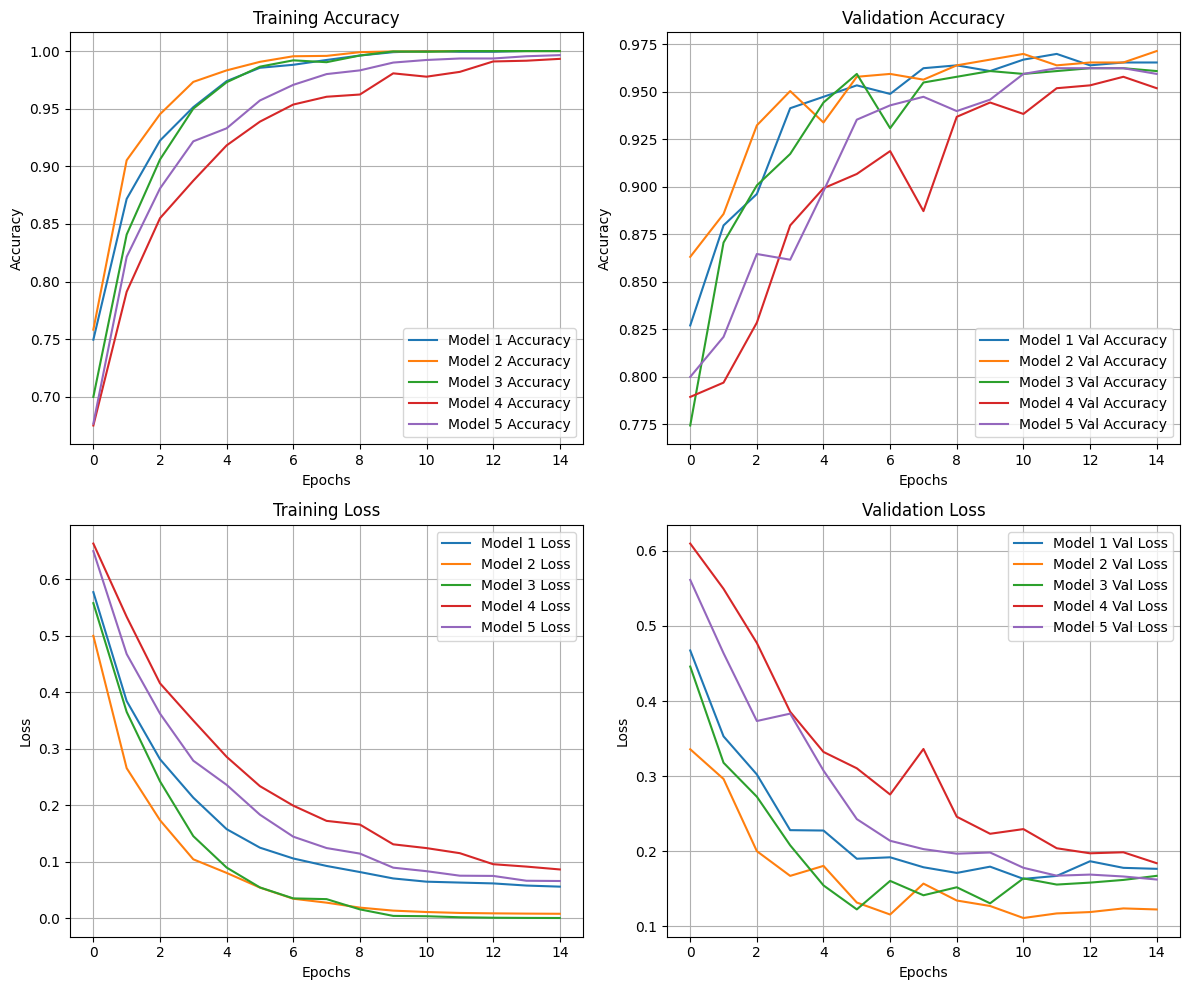

In [21]:
import matplotlib.pyplot as plt

# Create a figure to hold the plots
plt.figure(figsize=(12, 10))

# Plot Training Accuracy
plt.subplot(2, 2, 1)
plt.plot(train_1.history['accuracy'], label='Model 1 Accuracy')
plt.plot(train_2.history['accuracy'], label='Model 2 Accuracy')
plt.plot(train_3.history['accuracy'], label='Model 3 Accuracy')
plt.plot(train_4.history['accuracy'], label='Model 4 Accuracy')  # Adding Model 4 Accuracy
plt.plot(train_5.history['accuracy'], label='Model 5 Accuracy')  # Adding Model 5 Accuracy
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(train_1.history['val_accuracy'], label='Model 1 Val Accuracy')
plt.plot(train_2.history['val_accuracy'], label='Model 2 Val Accuracy')
plt.plot(train_3.history['val_accuracy'], label='Model 3 Val Accuracy')
plt.plot(train_4.history['val_accuracy'], label='Model 4 Val Accuracy')  # Adding Model 4 Val Accuracy
plt.plot(train_5.history['val_accuracy'], label='Model 5 Val Accuracy')  # Adding Model 5 Val Accuracy
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot Training Loss
plt.subplot(2, 2, 3)
plt.plot(train_1.history['loss'], label='Model 1 Loss')
plt.plot(train_2.history['loss'], label='Model 2 Loss')
plt.plot(train_3.history['loss'], label='Model 3 Loss')
plt.plot(train_4.history['loss'], label='Model 4 Loss')  # Adding Model 4 Loss
plt.plot(train_5.history['loss'], label='Model 5 Loss')  # Adding Model 5 Loss
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Validation Loss
plt.subplot(2, 2, 4)
plt.plot(train_1.history['val_loss'], label='Model 1 Val Loss')
plt.plot(train_2.history['val_loss'], label='Model 2 Val Loss')
plt.plot(train_3.history['val_loss'], label='Model 3 Val Loss')
plt.plot(train_4.history['val_loss'], label='Model 4 Val Loss')  # Adding Model 4 Val Loss
plt.plot(train_5.history['val_loss'], label='Model 5 Val Loss')  # Adding Model 5 Val Loss
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


Because the l2 regulariser is set highly at 0.5. It delays the convergen of gradient descent and delays the accuracy betterment.

In [18]:
import pandas as pd

# Define the data
data = {
    "Feature": [
        "L2 Regularization",
        "Filter Sizes",
        "Number of Conv Layers",
        "Max Pooling Layers",
        "Dense Layers",
        "Learning Rate",
        "Expected Behavior"
    ],
    "Model 1 (model)": [
        "Yes (0.5)",
        "32, 32, 32",
        3,
        3,
        "1 Dense (256 units)",
        "1.5e-4",
        "Better generalization due to regularization, but slower convergence"
    ],
    "Model 2 (model2)": [
        "Yes(0.0001)",
        "32, 32, 32",
        3,
        3,
        "1 Dense (256 units)",
        "1.5e-4",
        "Faster potential overfitting"
    ],
    "Model 3 (model3)": [
        "No",
        "16, 32, 16",
        3,
        3,
        "1 Dense (256 units)",
        "1.5e-4",
        "Similar to model2 but with different filter configuration"
    ]
}

# Create the DataFrame
model_comparison_df = pd.DataFrame(data)

# Display the DataFrame
model_comparison_df

,Feature,Model 1 (model),Model 2 (model2),Model 3 (model3)
0,L2 Regularization,Yes (0.5),Yes(0.0001),No
1,Filter Sizes,"32, 32, 32","32, 32, 32","16, 32, 16"
2,Number of Conv Layers,3,3,3
3,Max Pooling Layers,3,3,3
4,Dense Layers,1 Dense (256 units),1 Dense (256 units),1 Dense (256 units)
5,Learning Rate,1.5e-4,1.5e-4,1.5e-4
6,Expected Behavior,"Better generalization due to regularization, b...",Faster potential overfitting,Similar to model2 but with different filter co...


In [31]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming you have trained models (model_1, model_2, model_3, model_4, model_5)
# X_test: test features, y_test: true labels for test data

# Generate predictions for each model
y_pred_1 = model.predict(X_test)
y_pred_2 = model2.predict(X_test)
y_pred_3 = model3.predict(X_test)
y_pred_4 = model4.predict(X_test)
y_pred_5 = model5.predict(X_test)  # Adding Model 5 predictions

# Convert continuous predictions to binary using a threshold of 0.5
y_pred_1_binary = (y_pred_1 > 0.5).astype("int32")
y_pred_2_binary = (y_pred_2 > 0.5).astype("int32")
y_pred_3_binary = (y_pred_3 > 0.5).astype("int32")
y_pred_4_binary = (y_pred_4 > 0.5).astype("int32")
y_pred_5_binary = (y_pred_5 > 0.5).astype("int32")  # Adding Model 5 binary conversion

# Generate classification reports for each model
report_1 = classification_report(y_test, y_pred_1_binary, output_dict=True)
report_2 = classification_report(y_test, y_pred_2_binary, output_dict=True)
report_3 = classification_report(y_test, y_pred_3_binary, output_dict=True)
report_4 = classification_report(y_test, y_pred_4_binary, output_dict=True)
report_5 = classification_report(y_test, y_pred_5_binary, output_dict=True)  # Adding Model 5 report

# Convert reports to DataFrames
df_1 = pd.DataFrame(report_1).transpose()
df_2 = pd.DataFrame(report_2).transpose()
df_3 = pd.DataFrame(report_3).transpose()
df_4 = pd.DataFrame(report_4).transpose()
df_5 = pd.DataFrame(report_5).transpose()  # Adding Model 5 DataFrame

# Add model names to differentiate in final DataFrame
df_1['Model'] = 'Model 1'
df_2['Model'] = 'Model 2'
df_3['Model'] = 'Model 3'
df_4['Model'] = 'Model 4'
df_5['Model'] = 'Model 5'  # Adding Model 5 name

# Combine all reports into one DataFrame
df_combined = pd.concat([df_1, df_2, df_3, df_4, df_5])  # Including Model 5

# Reset index for better visualization
df_combined.reset_index(inplace=True)

# Show the DataFrame with metrics
df_combined


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 510ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step


,index,precision,recall,f1-score,support,Model
0,0,0.976271,0.966443,0.971332,298.000000,Model 1
1,1,0.973046,0.980978,0.976996,368.000000,Model 1
2,accuracy,0.974474,0.974474,0.974474,0.974474,Model 1
3,macro avg,0.974659,0.973711,0.974164,666.000000,Model 1
4,weighted avg,0.974489,0.974474,0.974462,666.000000,Model 1
5,0,0.957096,0.973154,0.965058,298.000000,Model 2
6,1,0.977961,0.964674,0.971272,368.000000,Model 2
7,accuracy,0.968468,0.968468,0.968468,0.968468,Model 2
8,macro avg,0.967529,0.968914,0.968165,666.000000,Model 2
9,weighted avg,0.968625,0.968468,0.968492,666.000000,Model 2


In [32]:
df_combined[df_combined['index'] == 'accuracy'].drop('index',axis = 1)

,precision,recall,f1-score,support,Model
2,0.974474,0.974474,0.974474,0.974474,Model 1
7,0.968468,0.968468,0.968468,0.968468,Model 2
12,0.963964,0.963964,0.963964,0.963964,Model 3
17,0.956456,0.956456,0.956456,0.956456,Model 4
22,0.963964,0.963964,0.963964,0.963964,Model 5


In [34]:
# Add model names to differentiate in final DataFrame
df_1['Model'] = 'Model 1'
df_2['Model'] = 'Model 2'
df_3['Model'] = 'Model 3'
df_4['Model'] = 'Model 4'
df_5['Model'] = 'Model 5'  # Adding Model 5 name

# Combine all reports into one DataFrame
df_combined = pd.concat([df_1, df_2, df_3, df_4, df_5])  # Including Model 5

# Reset index for better visualization
df_combined.reset_index(inplace=True)

# Define new columns for L2 Regularization and Dropout
l2_regularization = [0.001, 0.0001, None, 0.001, 0.0001]
dropout = [None, None, None, 0.20, 0.10]

# Add the new columns to the combined DataFrame
df_combined['L2 Regularization'] = df_combined['Model'].map(dict(zip(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], l2_regularization)))
df_combined['Dropout'] = df_combined['Model'].map(dict(zip(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], dropout)))

# Show the DataFrame with metrics and new columns
df_combined

,index,precision,recall,f1-score,support,Model,L2 Regularization,Dropout
0,0,0.976271,0.966443,0.971332,298.000000,Model 1,0.0010,NaN
1,1,0.973046,0.980978,0.976996,368.000000,Model 1,0.0010,NaN
2,accuracy,0.974474,0.974474,0.974474,0.974474,Model 1,0.0010,NaN
3,macro avg,0.974659,0.973711,0.974164,666.000000,Model 1,0.0010,NaN
4,weighted avg,0.974489,0.974474,0.974462,666.000000,Model 1,0.0010,NaN
5,0,0.957096,0.973154,0.965058,298.000000,Model 2,0.0001,NaN
6,1,0.977961,0.964674,0.971272,368.000000,Model 2,0.0001,NaN
7,accuracy,0.968468,0.968468,0.968468,0.968468,Model 2,0.0001,NaN
8,macro avg,0.967529,0.968914,0.968165,666.000000,Model 2,0.0001,NaN
9,weighted avg,0.968625,0.968468,0.968492,666.000000,Model 2,0.0001,NaN


In [35]:
df_combined[df_combined['index'] == 'accuracy'].drop('index',axis = 1)

,precision,recall,f1-score,support,Model,L2 Regularization,Dropout
2,0.974474,0.974474,0.974474,0.974474,Model 1,0.0010,NaN
7,0.968468,0.968468,0.968468,0.968468,Model 2,0.0001,NaN
12,0.963964,0.963964,0.963964,0.963964,Model 3,NaN,NaN
17,0.956456,0.956456,0.956456,0.956456,Model 4,0.0010,0.2
22,0.963964,0.963964,0.963964,0.963964,Model 5,0.0001,0.1
